<h1 style="text-align:center; color:yellow;">Graduate Admission Prediction using ANN</h1>

In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.drop(columns=["Serial No."],inplace=True)

In [26]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [30]:
X=df.drop(columns=["Chance of Admit "])
y=df["Chance of Admit "]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()

scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [34]:
model=Sequential()

In [35]:
model.add(Dense(10,activation='relu',input_dim=7))

In [36]:
model.add(Dense(5,activation='relu'))

In [37]:
model.add(Dense(1,activation='linear'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss='mean_squared_error',optimizer="Adam")

In [43]:
from sklearn import metrics


history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
10/10 [==============================] - 0s 18ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 2/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.0076
Epoch 3/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0063 - val_loss: 0.0072
Epoch 5/25
10/10 [==============================] - 0s 10ms/step - loss: 0.0061 - val_loss: 0.0070
Epoch 6/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 7/25
10/10 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0067
Epoch 8/25
10/10 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0066
Epoch 9/25
10/10 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0065
Epoch 10/25
10/10 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0063
Epoch 11/25
10

In [44]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7519876089178846

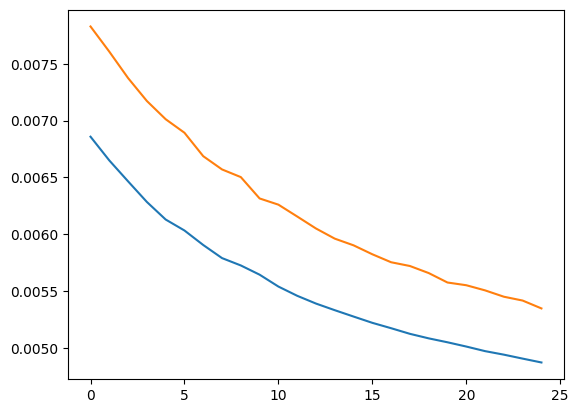

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);